<a href="https://colab.research.google.com/github/Raflianjay/Tugas13/blob/main/PythonTugas13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#PATH LOSS COST231 FUNCTION
def cos(frek,tipe,ht,hr,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [3]:
f1=1800 #MHz
f2=900
f3=700
loc1='urban'
loc2='suburban'
loc3='open'
tower=80 #m
user=1.5 #m
dmin=200 #m
dmax=700 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)

In [4]:
print(d)

[424 395 307 384 302 282 641 237 589 247 648 527 256 200 361 486 420 364
 556 542 477 277 481 247 543 436 499 451 381 410 275 510 251 254 472 335
 388 681 393 404 558 370 450 284 677 342 527 326 211 364 288 208 690 269
 461 311 405 333 602 559 277 524 590 628 350 340 658 247 522 570 560 477
 693 595 690 531 460 264 275 243 593 679 421 280 212 560 628 287 672 406
 312 445 338 582 432 442 207 687 365 595 246 473 386 561 695 509 582 304
 408 599 363 617 279 575 594 698 473 244 291 634 202 431 588 578 404 688
 356 439 367 333 657 422 697 361 690 579 615 296 339 471 393 478 510 562
 676 643 557 681 276 516 554 609 418 318 329 688 204 253 314 554 237 393
 554 676 528 463 339 224 662 256 213 243 240 689 414 562 593 519 683 311
 414 450 642 445 479 592 370 615 602 533 332 379 471 461 492 330 615 329
 532 215]


In [5]:
#COST 231 DEF
LpUrban1 = cos(f1,loc1,tower,user,d)
LpUrban2 = cos(f2,loc1,tower,user,d)
LpUrban3 = cos(f3,loc1,tower,user,d)
LpSubUrban = cos(f1,loc2,tower,user,d)
LpOpen = cos(f1,loc3,tower,user,d)

In [6]:
#Sorting Array
d_sort=d[np.argsort(d)]
Urban1_sort=LpUrban1[np.argsort(d)]
Urban2_sort=LpUrban2[np.argsort(d)]
Urban3_sort=LpUrban3[np.argsort(d)]
SubUrban_sort=LpSubUrban[np.argsort(d)]
Open_sort=LpOpen[np.argsort(d)]

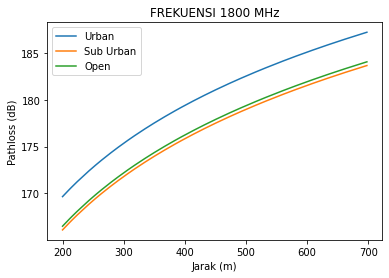

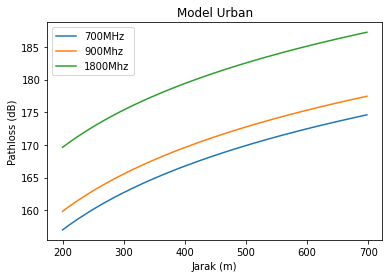

In [7]:
#Summarize Graph for F = 1800MHz
plt.plot(d_sort,Urban1_sort)
plt.plot(d_sort,SubUrban_sort)
plt.plot(d_sort,Open_sort)
plt.title('FREKUENSI 1800 MHz')
plt.ylabel('Pathloss (dB)')
plt.xlabel('Jarak (m)')
plt.legend(['Urban', 'Sub Urban', 'Open'], loc='upper left')
plt.show()

#Summarize Graph for Urban Location
plt.plot(d_sort,Urban3_sort)
plt.plot(d_sort,Urban2_sort)
plt.plot(d_sort,Urban1_sort)
plt.title('Model Urban')
plt.ylabel('Pathloss (dB)')
plt.xlabel('Jarak (m)')
plt.legend(['700MHz', '900Mhz', '1800Mhz'], loc='upper left')
plt.show()